In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from main import COCODataset

In [2]:
ds = COCODataset('data/train', 'data/annotations.json')
ds.lenc.classes_

array(['apple', 'banana', 'bowl', 'broccoli', 'carrot', 'cup',
       'dining table', 'knife'], dtype=object)

In [15]:
labels = ['apple', 'dining table', 'cup', 'bowl']
sizes = {k: [] for k in labels}
for img, ann in ds:
    classes = ds.lenc.inverse_transform(ann['labels'])
    for label, area in zip(classes, ann['area']):
        if label in sizes:
            sizes[label].append(area.item())

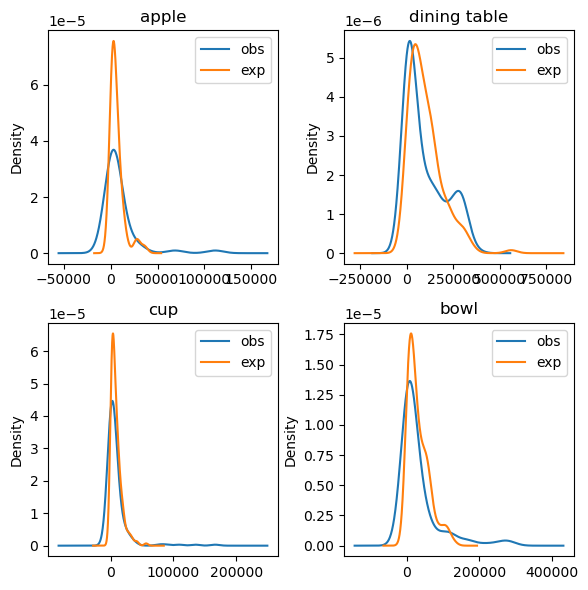

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
for (k, v), _ax in zip(sizes.items(), ax.ravel()):
    _ax.set_title(k)
    pd.Series(v).plot(kind='kde', ax=_ax, label='obs')
    x_exp = stats.expon(*stats.expon.fit(v)).rvs(len(v))
    pd.Series(x_exp).plot(kind='kde', ax=_ax, label='exp')
    _ax.legend()
plt.tight_layout()

In [23]:
n_objs = []
for img, ann in ds:
    n_objs.append(ann['labels'].shape[0])

<AxesSubplot:>

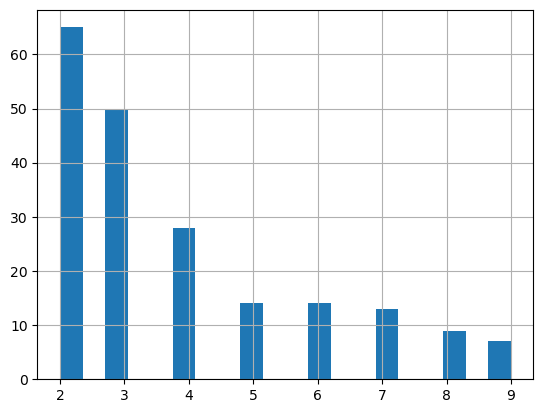

In [26]:
pd.Series(n_objs).hist(bins=20)

In [29]:
# That's one random variable - can you find others?